# $\text{ARIMA}(p,d,q)$

ARIMA stands for Auto Regressive Integrated Moving Average. The intent of $\text{ARIMA}(p,d,q)$ is to construct a stationary, $\text{ARMA}(p,q)$</br>
time series from a non-stationary time series by differencing $d$ times. Recall that an $\text{ARMA}(p,q)$ process is defined by,

$
\begin{align}
X_t = \varepsilon_t + \sum_{i=1}^p \varphi_i X_{t-i} + \sum_{i=1}^q \vartheta_i \varepsilon_{t-i}
\end{align}
$

In terms of the lag operator $L X_t = X_{t-1}, L^2 X_t = X_{t-2}, L^3 X_t = X_{t-3}, \ldots$, The $\text{ARMA}(p,q)$ model can be written as,

$
\begin{align}
\left( 1 - \sum_{i=1}^p \varphi_i L^i \right) X_t = \left( 1  + \sum_{i=1}^q \vartheta_i L^i \right)\varepsilon_{t}
\end{align}
$

The difference operator is given by $\Delta = (1 - L)$. If $X_t$ is stationary after $d$ differences it follows that $\left( 1 - L \right)^d X_t$ is stationary. This is the definition of integration order.</br> 
Thus, $\text{ARIMA}(p,d,q)$ can be written as,

$
\begin{align}
\left( 1 - \sum_{i=1}^p \varphi_i L^i \right) \left( 1 - L \right)^d X_t = \left( 1  + \sum_{i=1}^q \vartheta_i L^i \right)\varepsilon_{t}
\end{align}
$

The procedure followed to determine the order and coefficients of an $\text{ARIMA}(p,d,q)$ series is as follows.

1. Use ADF test to determine if series is stationary. To determine $d$ difference series until ADF test fails.
2. User PACF/ACF analysis to determine $p$ and $q$.
3. Perform regression on differenced series to determine coefficients.

## Includes

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import config
from lib.models import arima
from lib import stats
from lib.plots.data import (DataPlotType, stack, comparison)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## $\text{ARIMA}(1,1,0)$ Example

In [2]:
nsample = 1000
σ = 1.0
nlags = 10

In [3]:
φ = numpy.array([0.5])
d = 1
ar = arima.arp(φ, nsample)
samples = arima.arima_from_arma(ar, d)
diff_1 = arima.diff(samples)

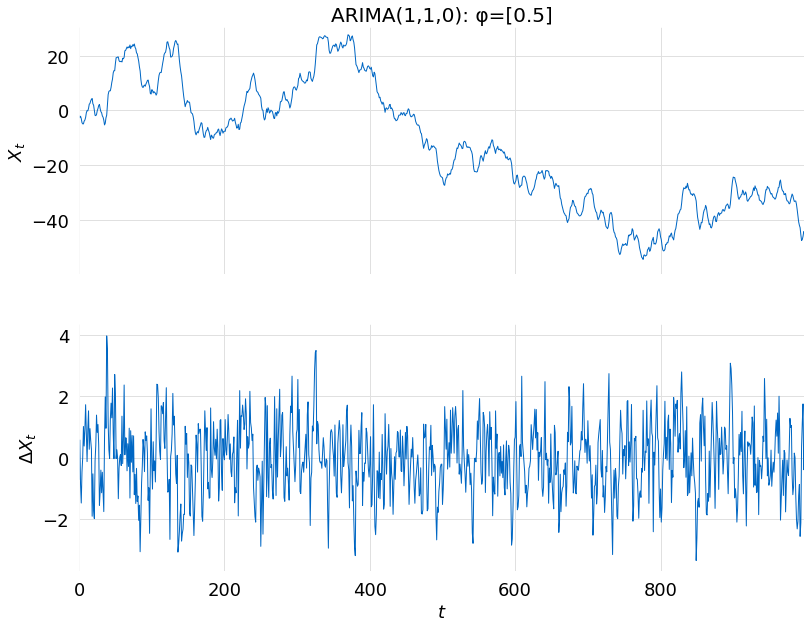

In [4]:
title = f"ARIMA(1,1,0): φ={φ}"
stack([samples[:-1], diff_1], title=title, plot_type=[DataPlotType.TIME_SERIES, DataPlotType.DIFF_1])

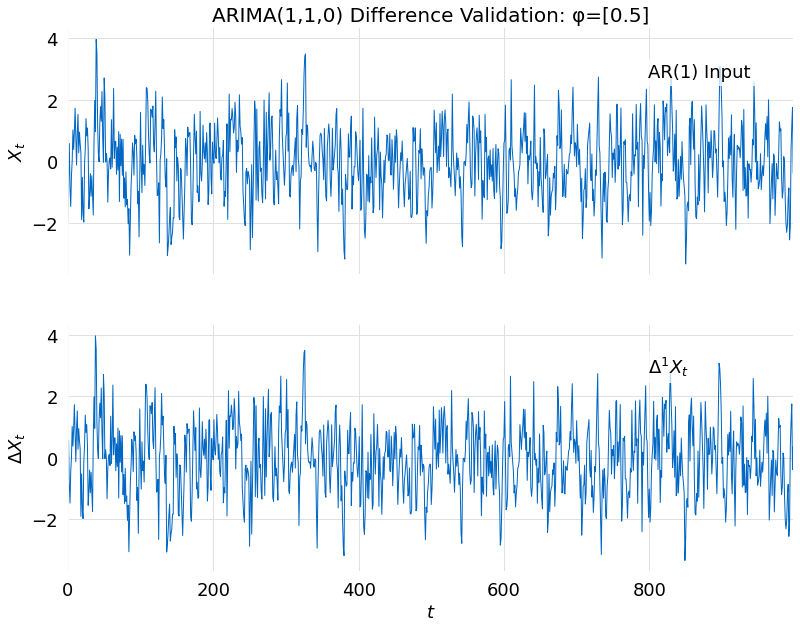

In [5]:
title = f"ARIMA(1,1,0) Difference Validation: φ={φ}"
stack([ar[:-1], diff_1], title=title, plot_type=[DataPlotType.TIME_SERIES, DataPlotType.DIFF_1], labels=[r"AR(1) Input", r"$\Delta^1 X_t$"])

In [6]:
arima.adf_test(samples, True)

╒════════════════╤════════════╕
│ Test Statistic │  -0.732243 │
├────────────────┼────────────┤
│ pvalue         │   0.399024 │
├────────────────┼────────────┤
│ Lags           │   1        │
├────────────────┼────────────┤
│ Number Obs     │ 998        │
╘════════════════╧════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56798 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Passed   │
╘════════════════╧══════════════════╧══════════╛


True

In [7]:
arima.adf_test(diff_1, True)

╒════════════════╤═══════════════╕
│ Test Statistic │ -17.3494      │
├────────────────┼───────────────┤
│ pvalue         │   9.87806e-29 │
├────────────────┼───────────────┤
│ Lags           │   0           │
├────────────────┼───────────────┤
│ Number Obs     │ 998           │
╘════════════════╧═══════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56798 │ Failed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Failed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Failed   │
╘════════════════╧══════════════════╧══════════╛


False

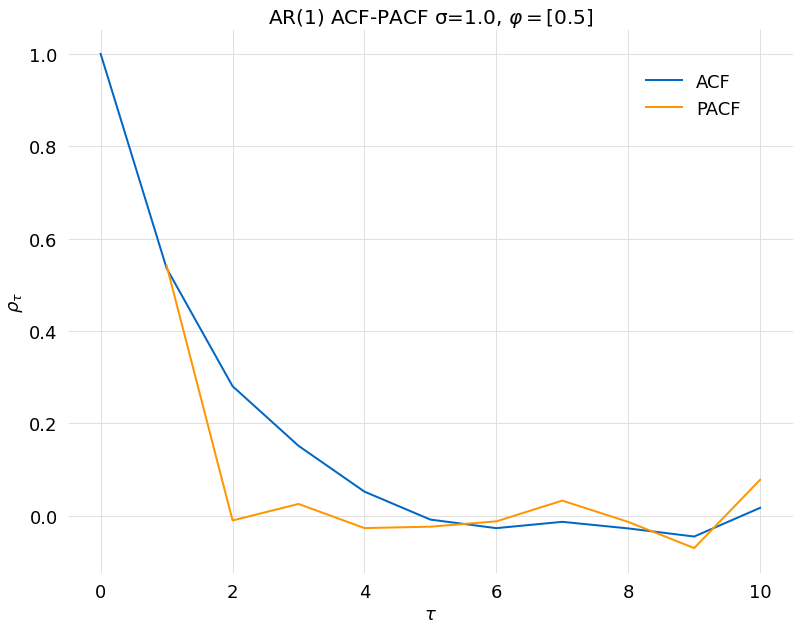

In [8]:
acf = stats.acf(diff_1, nlags)
pacf = arima.yw(diff_1, nlags)
title = f"AR(1) ACF-PACF σ={σ}, " + r"$\varphi=$"+f"{φ}"
y = [acf, pacf]
x = [range(nlags+1), range(1, nlags+1)]
comparison(y, x=x, title=title, labels=["ACF", "PACF"], plot_type=DataPlotType.ACF)

In [9]:
result = arima.ar_fit(diff_1, 1)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  999
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1391.763
Date:                Fri, 15 Apr 2022   AIC                           2789.525
Time:                        10:25:44   BIC                           2804.245
Sample:                             0   HQIC                          2795.120
                                - 999                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0425      0.066     -0.641      0.521      -0.173       0.088
ar.L1          0.5354      0.027     19.920      0.000       0.483       0.588
sigma2         0.9494      0.043     21.978      0.000       0.865       1.034
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.26
Prob(Q):                              0.86   Prob(JB):                         0.88
Heteroskedasticity (H):               0.85   Skew:                             0.02
Prob(H) (two-sided):                  0.15   Kurtosis:                         2.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## $\text{ARIMA}(1,2,0)$ Example

In [10]:
φ = numpy.array([0.75])
d = 2
ar = arima.arp(φ, nsample)
samples = arima.arima_from_arma(ar, d)
diff_1 = arima.diff(samples)
diff_2 = arima.diff(diff_1)

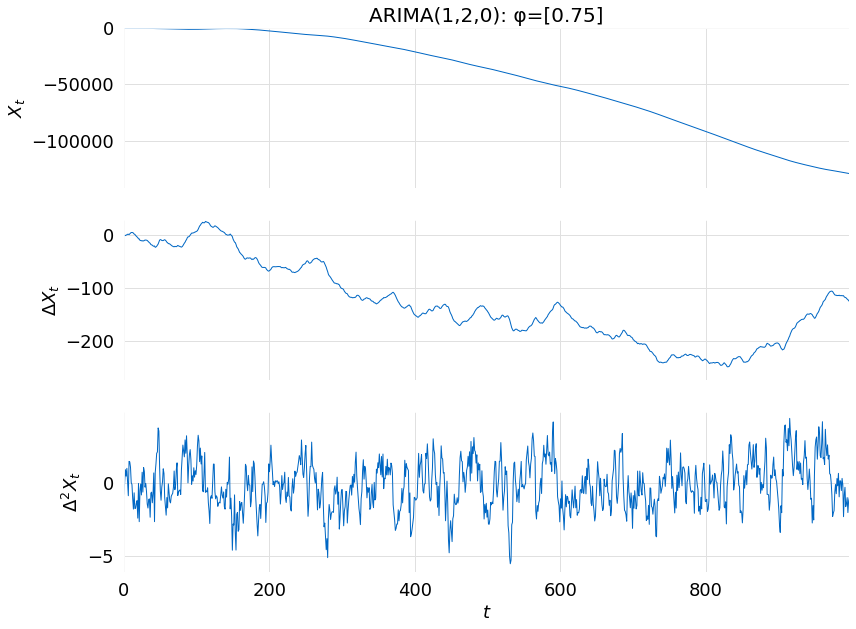

In [11]:
title = f"ARIMA(1,2,0): φ={φ}"
stack([samples[:-2], diff_1[:-1], diff_2], title=title, plot_type=[DataPlotType.TIME_SERIES, DataPlotType.DIFF_1, DataPlotType.DIFF_2])

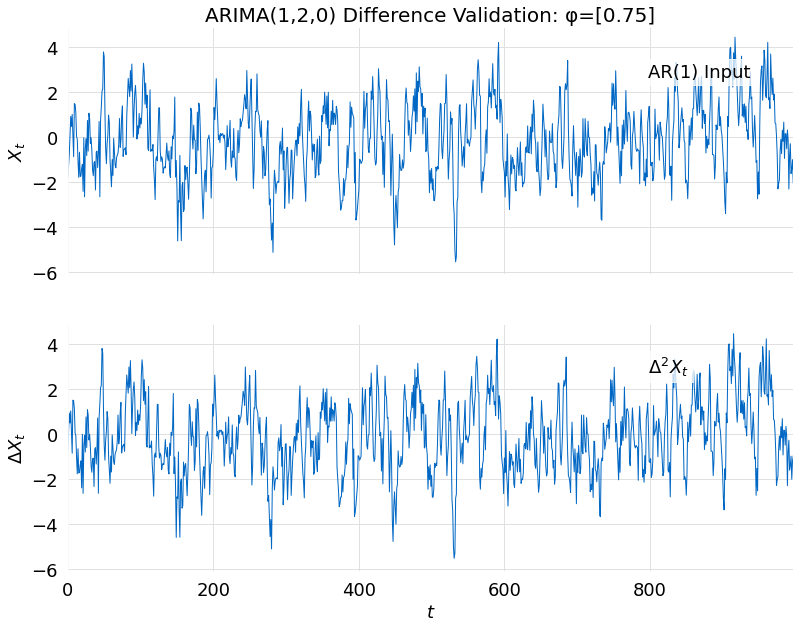

In [12]:
title = f"ARIMA(1,2,0) Difference Validation: φ={φ}"
stack([ar[:-2], diff_2], title=title, plot_type=[DataPlotType.TIME_SERIES, DataPlotType.DIFF_1], labels=[r"AR(1) Input", r"$\Delta^2 X_t$"])

In [13]:
arima.adf_test(samples, True)

╒════════════════╤════════════╕
│ Test Statistic │  -0.849133 │
├────────────────┼────────────┤
│ pvalue         │   0.349958 │
├────────────────┼────────────┤
│ Lags           │   9        │
├────────────────┼────────────┤
│ Number Obs     │ 990        │
╘════════════════╧════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.568   │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61655 │ Passed   │
╘════════════════╧══════════════════╧══════════╛


True

In [14]:
arima.adf_test(diff_1, True)

╒════════════════╤════════════╕
│ Test Statistic │  -0.206989 │
├────────────────┼────────────┤
│ pvalue         │   0.611318 │
├────────────────┼────────────┤
│ Lags           │   8        │
├────────────────┼────────────┤
│ Number Obs     │ 990        │
╘════════════════╧════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.568   │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61655 │ Passed   │
╘════════════════╧══════════════════╧══════════╛


True

In [15]:
arima.adf_test(diff_2, True)

╒════════════════╤═══════════════╕
│ Test Statistic │  -7.06113     │
├────────────────┼───────────────┤
│ pvalue         │   4.41818e-11 │
├────────────────┼───────────────┤
│ Lags           │   7           │
├────────────────┼───────────────┤
│ Number Obs     │ 990           │
╘════════════════╧═══════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.568   │ Failed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Failed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61655 │ Failed   │
╘════════════════╧══════════════════╧══════════╛


False

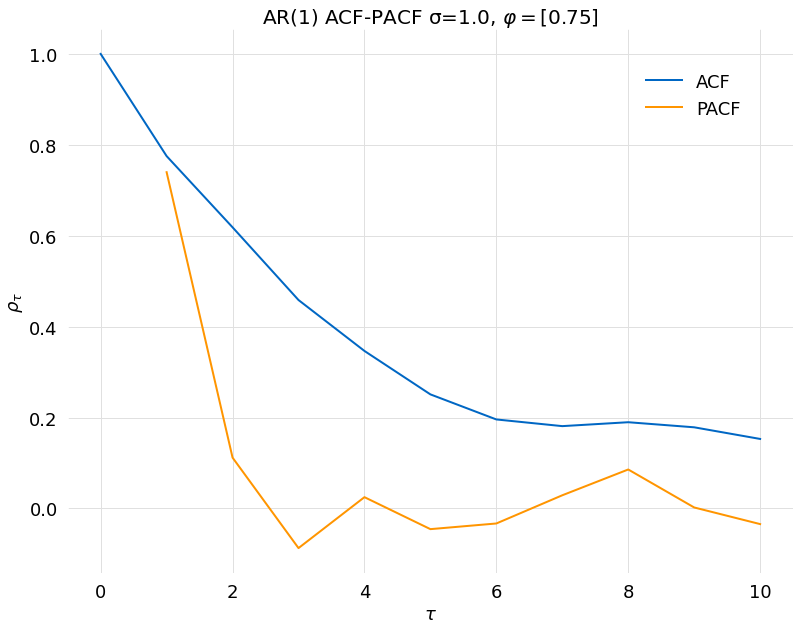

In [16]:
acf = stats.acf(diff_2, nlags)
pacf = arima.yw(diff_2, nlags)
title = f"AR(1) ACF-PACF σ={σ}, " + r"$\varphi=$"+f"{φ}"
y = [acf, pacf]
x = [range(nlags+1), range(1, nlags+1)]
comparison(y, x=x, title=title, labels=["ACF", "PACF"], plot_type=DataPlotType.ACF)

In [17]:
result = arima.ar_fit(diff_2, 1)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  998
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1442.523
Date:                Fri, 15 Apr 2022   AIC                           2891.046
Time:                        10:25:45   BIC                           2905.763
Sample:                             0   HQIC                          2896.640
                                - 998                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1319      0.144     -0.914      0.361      -0.415       0.151
ar.L1          0.7748      0.019     40.363      0.000       0.737       0.812
sigma2         1.0534      0.048     22.088      0.000       0.960       1.147
===================================================================================
Ljung-Box (L1) (Q):                   1.12   Jarque-Bera (JB):                 0.40
Prob(Q):                              0.29   Prob(JB):                         0.82
Heteroskedasticity (H):               1.04   Skew:                            -0.04
Prob(H) (two-sided):                  0.71   Kurtosis:                         2.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## $\text{ARIMA}(2,2,0)$ Example

In [18]:
φ = numpy.array([0.25, 0.4])
d = 2
ar = arima.arp(φ, nsample)
samples = arima.arima_from_arma(ar, d)
diff_1 = arima.diff(samples)
diff_2 = arima.diff(diff_1)

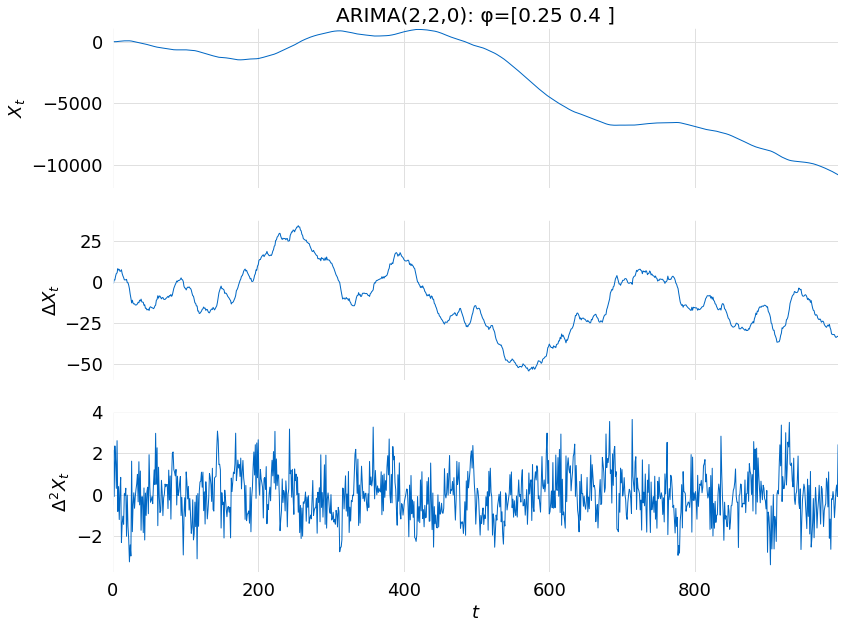

In [19]:
title = f"ARIMA(2,2,0): φ={φ}"
stack([samples[:-2], diff_1[:-1], diff_2], title=title, plot_type=[DataPlotType.TIME_SERIES, DataPlotType.DIFF_1, DataPlotType.DIFF_2])

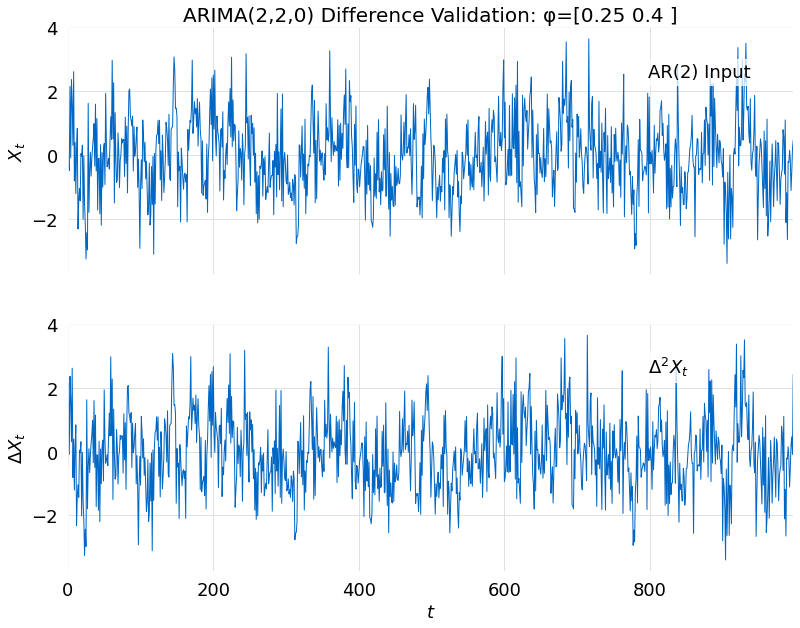

In [20]:
title = f"ARIMA(2,2,0) Difference Validation: φ={φ}"
stack([ar[:-2], diff_2], title=title, plot_type=[DataPlotType.TIME_SERIES, DataPlotType.DIFF_1], labels=[r"AR(2) Input", r"$\Delta^2 X_t$"])

In [21]:
arima.adf_test(samples, True)

╒════════════════╤════════════╕
│ Test Statistic │   0.593938 │
├────────────────┼────────────┤
│ pvalue         │   0.845568 │
├────────────────┼────────────┤
│ Lags           │   3        │
├────────────────┼────────────┤
│ Number Obs     │ 996        │
╘════════════════╧════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56799 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Passed   │
╘════════════════╧══════════════════╧══════════╛


True

In [22]:
arima.adf_test(diff_1, True)

╒════════════════╤═════════════╕
│ Test Statistic │  -1.65205   │
├────────────────┼─────────────┤
│ pvalue         │   0.0931142 │
├────────────────┼─────────────┤
│ Lags           │   2         │
├────────────────┼─────────────┤
│ Number Obs     │ 996         │
╘════════════════╧═════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56799 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Failed   │
╘════════════════╧══════════════════╧══════════╛


False

In [23]:
arima.adf_test(diff_2, True)

╒════════════════╤═══════════════╕
│ Test Statistic │ -11.81        │
├────────────────┼───────────────┤
│ pvalue         │   1.66807e-21 │
├────────────────┼───────────────┤
│ Lags           │   1           │
├────────────────┼───────────────┤
│ Number Obs     │ 996           │
╘════════════════╧═══════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56799 │ Failed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Failed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Failed   │
╘════════════════╧══════════════════╧══════════╛


False

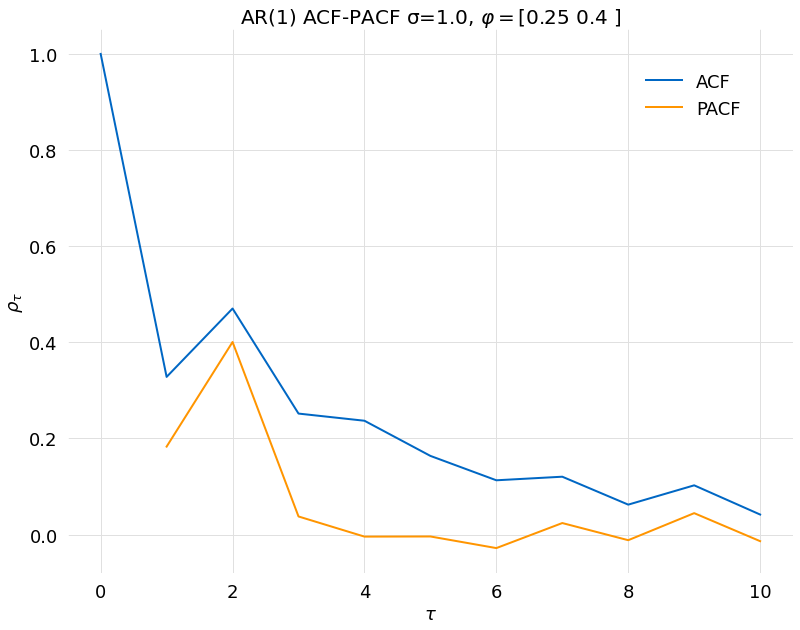

In [24]:
acf = stats.acf(diff_2, nlags)
pacf = arima.yw(diff_2, nlags)
title = f"AR(1) ACF-PACF σ={σ}, " + r"$\varphi=$"+f"{φ}"
y = [acf, pacf]
x = [range(nlags+1), range(1, nlags+1)]
comparison(y, x=x, title=title, labels=["ACF", "PACF"], plot_type=DataPlotType.ACF)

In [25]:
result = arima.ar_fit(diff_2, 2)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  998
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1424.685
Date:                Fri, 15 Apr 2022   AIC                           2857.370
Time:                        10:25:46   BIC                           2876.993
Sample:                             0   HQIC                          2864.829
                                - 998                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0255      0.081     -0.316      0.752      -0.184       0.133
ar.L1          0.1940      0.028      6.912      0.000       0.139       0.249
ar.L2          0.4089      0.030     13.749      0.000       0.351       0.467
sigma2         1.0169      0.044     23.110      0.000       0.931       1.103
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                 5.69
Prob(Q):                              0.68   Prob(JB):                         0.06
Heteroskedasticity (H):               1.11   Skew:                             0.16
Prob(H) (two-sided):                  0.35   Kurtosis:                         3.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""